# Integrantes:
- Jorge Eduardo Rodriguez Cardozo - 200711501
- German Augusto Carvajal Murcia -  201313516

# Exercise 7

Data Preparation

We will train our network on the **CIFAR10** [dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains `50,000` 32x32 color training images, labeled over 10 categories, and 10,000 test images. 

As this dataset is also included in Keras datasets, we just ask the `keras.datasets` module for the dataset.

Training and test images are normalized to lie in the $\left[0,1\right]$ interval.

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Normal option with full database
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()  # File is 160MB

In [3]:
# Only the first training batch and testing  # File is 58MB
import tarfile
from six.moves import cPickle

# Use local copy of the cifar-10 database
data_tar = tarfile.open('../datasets/cifar-10-python_trainingbatch1_test.tar.gz')

def extract_xy(member, data_tar):
    d = cPickle.load(data_tar.extractfile(member), encoding='bytes')
    d_decoded = {}
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    X = d['data']
    X = X.reshape(X.shape[0], 3, 32, 32)
    y = d['labels']
    return X.transpose(0, 2, 3, 1), np.reshape(y, (len(y), 1))

X_train, y_train = extract_xy('cifar-10-batches-py/data_batch_1', data_tar)
X_test, y_test = extract_xy('cifar-10-batches-py/test_batch', data_tar)

In [4]:
X_train.shape, X_test.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
nb_classes = y_train.max() + 1
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [6]:
labels = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [7]:
X_train[0].shape

(32, 32, 3)

In [8]:
y_train[0]

array([6])

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

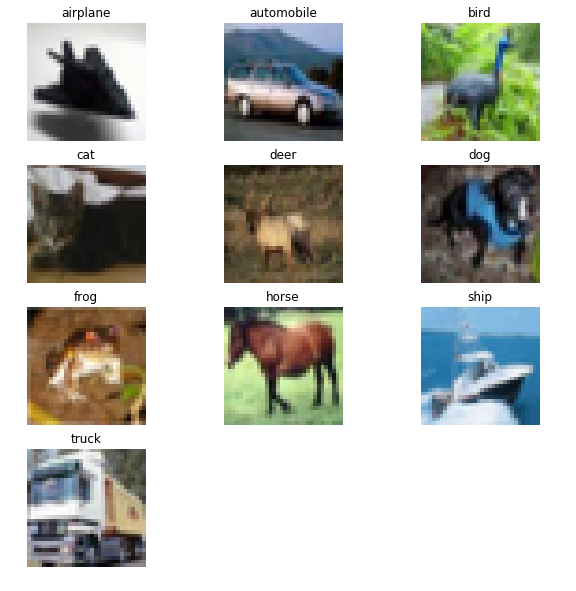

In [10]:
# Select one image per y
images = [np.nonzero(Y_train[:,i] == 1)[0][0] for i in range(nb_classes)]

# Plot all images
fig, ax = plt.subplots(4,3, figsize=(10,10))
ax = ax.reshape(12)
for i in range(nb_classes):
    ax[i].imshow(X_train[images[i]])
    ax[i].set_title(labels[y_train[images[i]][0]])
    ax[i].axis('off')

ax[-1].axis('off')
ax[-2].axis('off')
plt.show()

# Exercise 08.1

Train a Softmax regression using keras
Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 31% with 50 epochs)

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras

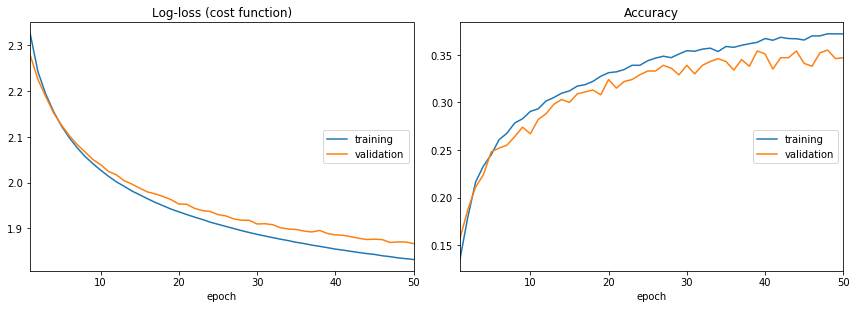

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None
Test score: 1.871390427017212
Test accuracy: 0.3507


In [12]:
np.random.seed(123)
tf.set_random_seed(123)
rmsprop=RMSprop(lr=0.00001)
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,Y_train,batch_size=32,epochs=50,verbose=0,validation_split=0.1,callbacks=[PlotLossesKeras()])
score=model.evaluate(X_test,Y_test,verbose=0)
print(model.summary())
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Exercise 08.2

Train a Deep Neural Network with the following architecture:

- Input = Image (32, 32, 3)
- Conv2d(32, (3,3), padding='same')
- Relu Activation
- MaxPooling2D (2,2)
- Dropout(0.5)
- Flatten
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

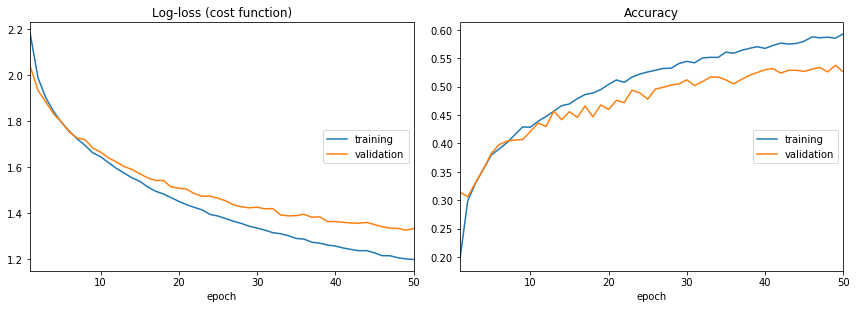

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                81930     
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [13]:
np.random.seed(123)
tf.set_random_seed(123)
rmsprop=RMSprop(lr=0.0001)
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,Y_train,batch_size=32,epochs=50,verbose=0,validation_split=0.1,callbacks=[PlotLossesKeras()])
score=model.evaluate(X_test,Y_test,verbose=0)
print(model.summary())
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Exercise 08.3

Use the last layer of VGG16 as the input to a neural network with softmax output

- Input = Image (32, 32, 3)
- VGG16 
- Flatten
- Dense(512, Softmax)
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 57% with 50 epochs)

In [14]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [15]:
X_input_train=model_vgg16.predict(X_train)
X_input_test=model_vgg16.predict(X_test)
del model_vgg16

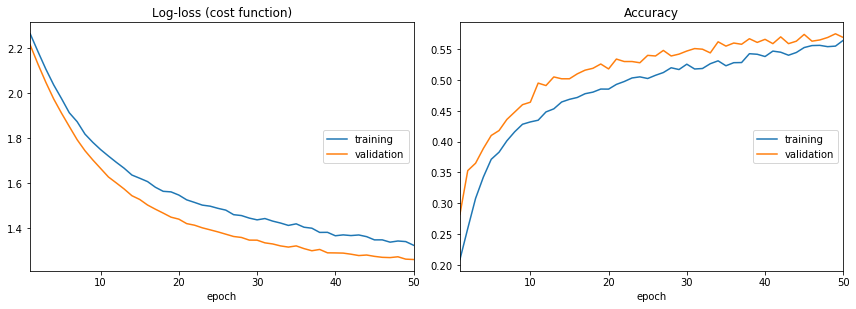

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________
None
Test score: 1.3073449615478516
Test accuracy: 0.5544


In [16]:
np.random.seed(123)
tf.set_random_seed(123)
rmsprop=RMSprop(lr=0.001)
model=Sequential()
model.add(Flatten(input_shape=(1,1,512)))
model.add(Dense(512,activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax'))
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_input_train,Y_train,batch_size=32,epochs=50,verbose=0,validation_split=0.1,callbacks=[PlotLossesKeras()])
score=model.evaluate(X_input_test,Y_test,verbose=0)
print(model.summary())
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Exercise *08.4 (Bonus)

Test a different pre-train algorithm (https://keras.io/applications/#usage-examples-for-image-classification-models) 

In [22]:
from keras.applications.vgg19 import VGG19
model_vgg19 = VGG19(weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 318s 4us/step


In [24]:
X_input2_train=model_vgg19.predict(X_train)
X_input2_test=model_vgg19.predict(X_test)
del model_vgg19

In [25]:
X_input2_train.shape

(10000, 1, 1, 512)

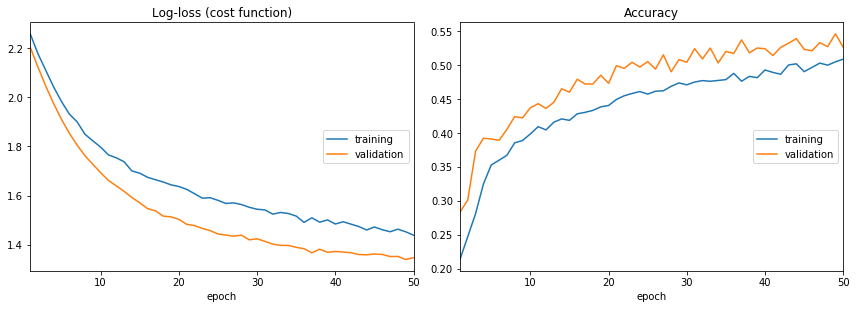

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________
None
Test score: 1.3582483125686646
Test accuracy: 0.5394


In [26]:
np.random.seed(123)
tf.set_random_seed(123)
rmsprop=RMSprop(lr=0.001)
model=Sequential()
model.add(Flatten(input_shape=(1,1,512)))
model.add(Dense(512,activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax'))
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_input2_train,Y_train,batch_size=32,epochs=50,verbose=0,validation_split=0.1,callbacks=[PlotLossesKeras()])
score=model.evaluate(X_input2_test,Y_test,verbose=0)
print(model.summary())
print('Test score:', score[0]) 
print('Test accuracy:', score[1])